In [12]:
import pandas as pd
import numpy as np

orcs = pd.read_csv('orcs_cleaned.csv', index_col=0, encoding='utf-8')
orcs.family = orcs.family.astype('int')
orcs

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,,
2,33,русский,1,среднее,Старший Сержант,Кировская область
3,28,бурят,1,среднее,Младший Сержант,Сахалинская область
4,26,русский,1,среднее,Матрос,Приморский край
5,19,русский,1,среднее,Матрос,Приморский край
8,36,русский,1,среднее,Прапорщик,Томская область
...,...,...,...,...,...,...
110825,29,русский,0,среднее,Рядовой,Республика Адыгея
110826,37,русский,0,среднее,Старший Офицер,Республика Адыгея
110828,34,русский,1,среднее,Прапорщик,Республика Адыгея


<AxesSubplot:>

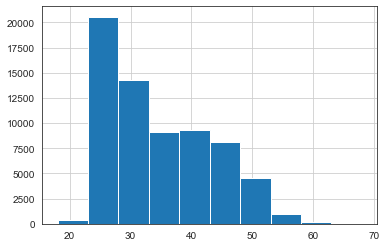

In [13]:
orcs.age.hist()

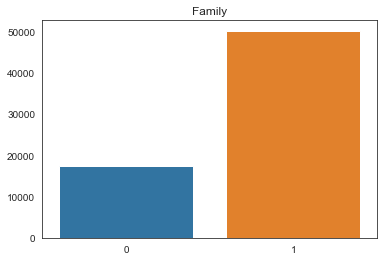

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
ax = sns.countplot(x='family', data=orcs).set_title('Family')
ax.axes.set_xlabel('')
ax.axes.set_ylabel('')
plt.show()

In [15]:
targets = orcs.mil_rank_cl
features = orcs.drop(['mil_rank_cl'], axis=1)
features = pd.get_dummies(features, columns=['nationality', 'region', 'family', 'edu_lvl_cl'])
features

In [ ]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
features.shape

In [17]:
from sklearn.preprocessing import LabelEncoder

targets = LabelEncoder().fit_transform(targets)   
targets

(100, 5)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=50, test_size=0.4)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier


dict_classifiers = {
        
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                             {
                                'n_neighbors': [1, 3, 5, 10],
                                'leaf_size': [3, 30]
                             }
                           ]
            },
             
    "Linear Support Vector Machine": 
            {'classifier': SVC(),
                 'params': [
                             {
                                'C': [0, 0.025, 0.01, 0.5, 1, 10, 100, 1000],
                                'gamma': [0.0001, 0.001, 0, 0.01, 0.1, 1, 5],
                                'kernel': ['linear']
                             }
                           ]
            },

    "Gaussian Support Vector Machine": 
            {'classifier': SVC(),
                 'params': [
                             {
                                'C': [0, 0.025, 0.01, 0.5, 1, 10, 100, 1000],
                                'gamma': [0.0001, 0.001, 0, 0.01, 0.1, 1, 5],
                                'kernel': ['rbf']
                             }
                           ]
            },

    "Decision Tree":
            {
                'classifier': DecisionTreeClassifier(),
                'params': [
                            {
                                'max_depth':[5, None]
                            }
                          ]
            },
            
    # "Random Forest": 
    #         {
    #             'classifier': RandomForestClassifier(),
    #             'params': [
    #                         {
    #                             'bootstrap': [True, False],
    #                             'max_depth': [10, 50, 100, None],
    #                             'max_features': ['auto', 'sqrt'],
    #                             'min_samples_leaf': [1, 2, 4],
    #                             'min_samples_split': [2, 5, 10],
    #                             'n_estimators': [10, 30, 50]
    #                         }
    #                       ]
    #         },

    "Naive Bayes": 
            {
                'classifier': GaussianNB(),
                'params': [
                            {
                                'var_smoothing': np.logspace(0, -9, 100)
                            }
                          ]
            },
            
    #"Logistic Regression":
    #        {
    #            'classifier': LogisticRegression(),
    #            'params': [
    #                        {
    #                            "C": np.logspace(-3, 3, 7), 
    #                            "penalty": ["l1", "l2"] # l1 lasso l2 ridge
    #                        }
    #                      ]
    #        },
            
    "AdaBoost Classifier":
            {
                'classifier': AdaBoostClassifier(),
                'params': [
                            {
                                'base_estimator__max_depth': [2, 4, 6, 8, 10],
                                'base_estimator__min_samples_leaf': [5, 10],
                                'n_estimators': [10, 50, 250, 1000],
                                'learning_rate': [0.01, 0.1]
                            }
                          ]
            },
               
    "Multilayer Perceptron":
            {
                'classifier': MLPClassifier(),
                'params': [
                            {
                                'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
                                'activation': ['tanh', 'relu'],
                                'solver': ['sgd', 'adam'],
                                'alpha': [0.0001, 0.05],
                                'learning_rate': ['constant','adaptive'],
                            }
                          ]
            },
            
    "Gradient Boosting Classifier":
            {
                'classifier': GradientBoostingClassifier(),
                'params': [
                            {
                                "loss": ["deviance"],
                                "learning_rate": [0.01, 0.05, 0.1, 0.2],
                                "min_samples_split": np.linspace(0.1, 0.5, 12),
                                "min_samples_leaf": np.linspace(0.1, 0.5, 12),
                                "max_depth": [3, 5, 8],
                                "max_features": ["log2", "sqrt"],
                                "criterion": ["friedman_mse", "mae"],
                                "subsample": [0.5, 0.7, 0.8, 0.9, 1.0],
                                "n_estimators": [10]
                            }
                          ]
            },
            
    "Gaussian Process":
            {
                'classifier': GaussianProcessClassifier(),
                'params': [
                            {

                            }
                          ]
            }
}

In [20]:
from sklearn.model_selection import learning_curve 


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [21]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score


num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose=True):
    df_results = pd.DataFrame(data = np.zeros(shape=(num_classifiers, 4)),
                              columns = ['classifier', 'train_score', 'test_score', 'training_time'])
    count = 0

    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        grid = GridSearchCV(classifier['classifier'], classifier['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
                            
        estimator = grid.fit(X_train, Y_train)
        t_diff = time.perf_counter() - t_start

        train_score = estimator.score(X_train, Y_train)
        test_score = estimator.score(X_test, Y_test)

        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff

        if verbose:
            print("Trained {c} in {f:.2f} s".format(c=key, f=t_diff))

        count += 1

        plot_learning_curve(estimator, "{}".format(key), X_train, Y_train, cv=3, n_jobs=3)
        
    return df_results

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Trained Random Forest in 23.07 s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


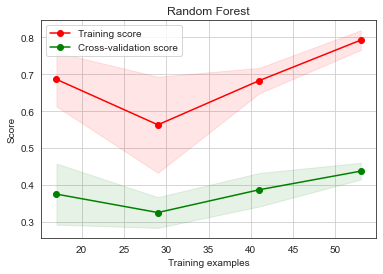

In [22]:
import warnings
# warnings.filterwarnings("ignore")

df_results = batch_classify(x_train, y_train, x_test, y_test)
df_results.sort_values(by='test_score', ascending=False, inplace=True)

In [24]:
df_results

,classifier,train_score,test_score,training_time
0,Random Forest,0.9875,0.45,23.07333
